In [4]:
import pickle
import pandas as pd
import numpy as np
model = pickle.load(open('lgb_model', 'rb'))
train_cols = pickle.load(open('train_column', 'rb')).columns
scrape_data = pd.read_csv('../../PycharmProjects/scrape_linkedin/result_gender.csv').drop('Name', axis=1)
print(train_cols)

Index(['TotalWorkingYears', 'JobLevel', 'NumCompaniesWorked', 'Education',
       'Age', 'Gender_Female', 'Gender_Male', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative'],
      dtype='object')


In [5]:
# prepare data for prediction
categorical = ['Gender', 'EducationField', 'Department', 'JobRole']
numerical = ['Education', 'Age', 'TotalWorkingYears', 'NumCompaniesWorked', 'JobLevel']

scrape_data = scrape_data.assign(Department=pd.Series('Sales', index=scrape_data.index))
scrape_data = scrape_data.assign(JobRole=pd.Series('Manager', index=scrape_data.index))
scrape_data = scrape_data.assign(JobLevel=pd.Series(2, index=scrape_data.index))

df_num = scrape_data[numerical]
df_cat = scrape_data[categorical]
df_cat = pd.get_dummies(df_cat)

df_scrape_missing = pd.concat([df_num, df_cat], axis=1)
print(df_scrape_missing)
# deal with missing columns
missing_cols = set(train_cols) - set(df_scrape_missing.columns)
for col in missing_cols:
    df_scrape_missing[col] = 0
df_scrape = df_scrape_missing[train_cols]
# df_scrape.head()

    Education  Age  TotalWorkingYears  NumCompaniesWorked  JobLevel  \
0           3   36                 22                   3         2   
1           3   30                  4                   3         2   
2           4   30                  8                   2         2   
3           3   48                 23                   5         2   
4           3   50                 19                   5         2   
5           3   20                  7                   5         2   
6           3   20                  4                   3         2   
7           4   27                  8                   1         2   
8           4   26                 12                   5         2   
9           3   47                 23                   5         2   
10          3   40                  8                   5         2   
11          3   33                  9                   3         2   
12          3   25                 23                   5         2   
13    

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

result = model.predict(df_scrape)
origin = []
predictions = []

for x in result:
    origin.append(np.argmax(x))
    
for x in result:
    max = x.argsort()[-1] #argsort 小->大的index　[-1]最大值的index
    if x[max]>0.8:
        predictions.append(max)
    elif max == 0:
        predictions.append(max)
    else:
        predictions.append(max-1)
# print(predictions)

plt.title('result_distribution')
plt.hist(origin, weights=np.ones(len(origin)) / len(origin))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(4), ('0', '1', '2', '3'))
plt.yticks(np.arange(0, 1, 0.1))

([<matplotlib.axis.YTick at 0x7f44d7999be0>,
 <a list of 10 Text yticklabel objects>)

([<matplotlib.axis.YTick at 0x7f44d7952898>,
 <a list of 9 Text yticklabel objects>)

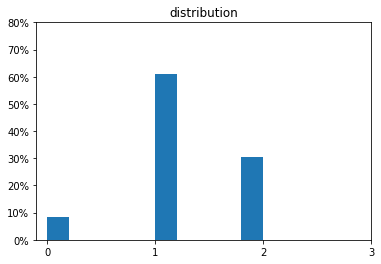

In [7]:
plt.title('distribution')
plt.hist(predictions, weights=np.ones(len(predictions)) / len(predictions))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(4), ('0', '1', '2', '3'))
plt.yticks(np.arange(0, 0.9, 0.1))

In [9]:
recommend = []
for index, pred in enumerate(predictions):
    if pred == 2:
        recommend.append(index)

for i in recommend:
    print(scrape_data.iloc[i].URL)

[2, 10, 13, 14, 20, 22, 24, 28, 29, 30, 32]
https://cn.linkedin.com/in/fu-bai-8b906673/zh-tw
https://www.linkedin.com/in/markeclinger
https://www.linkedin.com/in/adrianalmachado
https://www.linkedin.com/in/josiette-white-2785844/zh-tw
https://www.linkedin.com/in/alexday1
https://cn.linkedin.com/in/fu-bai-8b906673
https://jp.linkedin.com/in/shinya-kira-9ba983b/zh-cn
https://www.linkedin.com/in/drewmerle
https://www.linkedin.com/in/mikemelrose
https://www.linkedin.com/in/barackobama
https://www.linkedin.com/in/marcos-holanda-46861728
